# MSE 5720: Homework 1 
## Hanfeng Zhai
### NetID: $\tt hz253$
### Feb. 28, 2022



##Introduction


This homework includes the calculation of different properties of Boron Arsenide (BAs) using the DFT method. BAs is a chemical compound involving boron and arsenic, widely used in the semiconductor industry ([Wikipedia](https://en.wikipedia.org/wiki/Boron_arsenide)). In exercise 1 the k point grids and plane-wave cutoff are probed to test the energy convergence, specifically on converging the total energy differences. Due to the assumed infinite plane wave cannot being achieved in DFT, a cutoff has to be assumed. To prevent the overuse of computing power with a higher cutoff, an optimal value is desired. K point discretizes the computation domain by increasing the accuracy with higher values, yet also suffers the computational burden. In exercise 2, the optimized lattice constants are obtained using data fitting and Quantum ESPRESSO self-contained optimization algorithms with benchmark values from the literature. The two values are also compared and discussed. In exercise 3 the bulk modulus is computed using curve fitting, and the results were compared with the literature value. To note, bulk modulus can be computed from fitting the second order derivative of parabolic functions with respect to total energy or first order derivative of pressure. In exercise 4 the optimized lattice constant was computed using different pseudopotentials and compared the results from exercise 2. Noted that due to the pseudopotential variate of the DFT computation results, experimental results have to be elicited to benchmark the simulations. In exercise 5 a schematic diagram for the $\rm XSEDE$ computing environment was provided. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import Table
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


##Exercise 1: Convergence of total energy and forces

###Exercise 1a

*Set the calculation type to ```scf``` and calculate the total energy in a range from 20 – 100 Ry in increments of 10 Ry. A good absolute energy is converged when the energy difference between a given cutoff and the next highest cutoff is less than around 5 meV/formula unit. Tabulate and make a graph of the results.*

The data was obtained using the ```wget``` method from online. The value was extrcted through the ```awk``` method. The data was then postprocessed using the $\tt NumPy$ library. A table and two digrams containing the total energy and energy differences were provided.

In [ ]:
# !wget https://hanfengzhai.github.io/data/MSE5720/BAs_20.out https://hanfengzhai.github.io/data/MSE5720/BAs_30.out https://hanfengzhai.github.io/data/MSE5720/BAs_40.out https://hanfengzhai.github.io/data/MSE5720/BAs_50.out https://hanfengzhai.github.io/data/MSE5720/BAs_60.out https://hanfengzhai.github.io/data/MSE5720/BAs_70.out https://hanfengzhai.github.io/data/MSE5720/BAs_80.out https://hanfengzhai.github.io/data/MSE5720/BAs_90.out https://hanfengzhai.github.io/data/MSE5720/BAs_100.out https://hanfengzhai.github.io/data/MSE5720/BAs_10.out https://hanfengzhai.github.io/data/MSE5720/BAs_110.out

In [ ]:
!pwd
!awk '/!    total energy              =/' BAs_10.out BAs_20.out BAs_30.out \
BAs_40.out BAs_50.out BAs_60.out BAs_70.out BAs_80.out BAs_90.out\
 BAs_100.out BAs_110.out

/content
!    total energy              =     -45.95196226 Ry
!    total energy              =     -46.15612059 Ry
!    total energy              =     -46.17723831 Ry
!    total energy              =     -46.17881159 Ry
!    total energy              =     -46.17903577 Ry
!    total energy              =     -46.17936635 Ry
!    total energy              =     -46.17959211 Ry
!    total energy              =     -46.17963653 Ry
!    total energy              =     -46.17965637 Ry
!    total energy              =     -46.17968495 Ry
!    total energy              =     -46.17970248 Ry


In [ ]:
data_Q1a_raw = -np.array([45.95196226, 46.15612059, 46.17723831, 46.17881159, 46.17903577, 46.17936635,\
                46.17959211, 46.17963653, 46.17965637, 46.17968495, 46.17970248])
energy = data_Q1a_raw 
ener_diff = np.abs([data_Q1a_raw[1]-data_Q1a_raw[0],data_Q1a_raw[2]-data_Q1a_raw[1],data_Q1a_raw[3]-data_Q1a_raw[2],\
             data_Q1a_raw[4]-data_Q1a_raw[3],data_Q1a_raw[5]-data_Q1a_raw[4],data_Q1a_raw[6]-data_Q1a_raw[5],\
             data_Q1a_raw[7]-data_Q1a_raw[6],data_Q1a_raw[8]-data_Q1a_raw[7],data_Q1a_raw[9]-data_Q1a_raw[8]])
plane_wave = np.arange(20,110,10)
print(ener_diff)

[2.0415833e-01 2.1117720e-02 1.5732800e-03 2.2418000e-04 3.3058000e-04
 2.2576000e-04 4.4420000e-05 1.9840000e-05 2.8580000e-05]


In [ ]:
tab_1a = Table().with_columns(['Planewave cutoff [Ry]', plane_wave,\
                            'Energy [Ry]', data_Q1a_raw[1:10], \
                            '|Energy difference| [Ry]', ener_diff])
tab_1a

Planewave cutoff [Ry],Energy [Ry],|Energy difference| [Ry]
20,-46.1561,0.204158
30,-46.1772,0.0211177
40,-46.1788,0.00157328
50,-46.179,0.00022418
60,-46.1794,0.00033058
70,-46.1796,0.00022576
80,-46.1796,4.442e-05
90,-46.1797,1.984e-05
100,-46.1797,2.858e-05


Text(0, 0.5, 'Energy [Ry]')

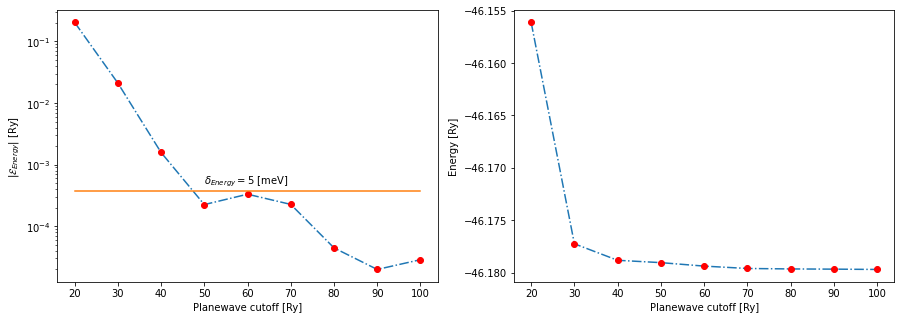

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(plane_wave, ener_diff, '-.') 
axs[0].plot(plane_wave, ener_diff, 'ro') 
axs[0].plot([20, 100], [0.00036749405469679, 0.00036749405469679], '-')
axs[0].text(50, 0.0005, '$\delta_{Energy} = 5$ [meV]')
axs[0].set_xlabel('Planewave cutoff [Ry]')
axs[0].set_ylabel('|$\mathcal{E}_{Energy}$| [Ry]')
axs[0].set_yscale('log')
axs[1].plot(plane_wave, energy[1:10], '-.') 
axs[1].plot(plane_wave, energy[1:10], 'ro') 
axs[1].set_xlabel('Planewave cutoff [Ry]')
axs[1].set_ylabel('Energy [Ry]')

From the left sub figure it can be deduced that the planewave cutoff is **50 Ry**.

###Exercise 1b

*Keep the calculation type as ```scf``` and set the plane wave cutoff to the converged value you found in the previous exercise; keep the plane wave cutoff (and other variables) constant while testing k-point convergence. There are some “cross effects” in testing cutoff and k-points separately, however we assume these are small. Calculate the total energy for a series of $\rm M\times M \times M$ grids, where M = 2, 3, 4, 5, 6 and 8. Record the total energy for each value of M.*

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/k2.out https://hanfengzhai.net/data/MSE5720/k3.out https://hanfengzhai.net/data/MSE5720/k4.out https://hanfengzhai.net/data/MSE5720/k5.out https://hanfengzhai.net/data/MSE5720/k6.out https://hanfengzhai.net/data/MSE5720/k7.out https://hanfengzhai.net/data/MSE5720/k8.out https://hanfengzhai.net/data/MSE5720/k9.out https://hanfengzhai.net/data/MSE5720/k10.out https://hanfengzhai.net/data/MSE5720/k11.out https://hanfengzhai.net/data/MSE5720/k12.out

In [ ]:
!awk '/!    total energy              =/' k2.out k3.out k4.out k5.out k6.out k7.out k8.out k9.out k10.out k11.out k12.out
!awk '/number of k points=/' k2.out k3.out k4.out k5.out k6.out k7.out k8.out k9.out k10.out k11.out k12.out

!    total energy              =     -45.97569371 Ry
!    total energy              =     -46.14456413 Ry
!    total energy              =     -46.17903577 Ry
!    total energy              =     -46.18823296 Ry
!    total energy              =     -46.19102795 Ry
!    total energy              =     -46.19195006 Ry
!    total energy              =     -46.19227521 Ry
!    total energy              =     -46.19239387 Ry
!    total energy              =     -46.19243860 Ry
!    total energy              =     -46.19245693 Ry
!    total energy              =     -46.19246416 Ry
     number of k points=     3
     number of k points=     4
     number of k points=     8
     number of k points=    10
     number of k points=    16
     number of k points=    20
     number of k points=    29
     number of k points=    35
     number of k points=    47
     number of k points=    56
     number of k points=    72


In [ ]:
data_Q1b_raw = np.array([-45.97632130, -46.14456413, -46.17903577, -46.18823296, -46.19102795, -46.19195006, -46.19227521, -46.19239387, -46.19243860, -46.19245693, -46.19246416])
energy_k = data_Q1b_raw 
k_point_unique = np.array([3,4,8,10,16,20,29,35,47,56,72])
ener_diff_k = np.abs([data_Q1b_raw[1]-data_Q1b_raw[0],data_Q1b_raw[2]-data_Q1b_raw[1],data_Q1b_raw[3]-data_Q1b_raw[2],\
 data_Q1b_raw[4]-data_Q1b_raw[3],data_Q1b_raw[5]-data_Q1b_raw[4],data_Q1b_raw[6]-data_Q1b_raw[5],\
 data_Q1b_raw[7]-data_Q1b_raw[6],data_Q1b_raw[8]-data_Q1b_raw[7],data_Q1b_raw[9]-data_Q1b_raw[8],\
 data_Q1b_raw[10]-data_Q1b_raw[9]])
kpoint = np.array([2,3,4,5,6,7,8,9,10,11,12])
print(ener_diff_k)


[1.6824283e-01 3.4471640e-02 9.1971900e-03 2.7949900e-03 9.2211000e-04
 3.2515000e-04 1.1866000e-04 4.4730000e-05 1.8330000e-05 7.2300000e-06]


In [ ]:
tab_1b = Table().with_columns(['M grids', kpoint, 'k points number', k_point_unique, 'Energy [Ry]', data_Q1b_raw])
tab_1b

M grids,k points number,Energy [Ry]
2,3,-45.9763
3,4,-46.1446
4,8,-46.179
5,10,-46.1882
6,16,-46.191
7,20,-46.192
8,29,-46.1923
9,35,-46.1924
10,47,-46.1924
11,56,-46.1925


Text(0, 0.5, 'Energy [Ry]')

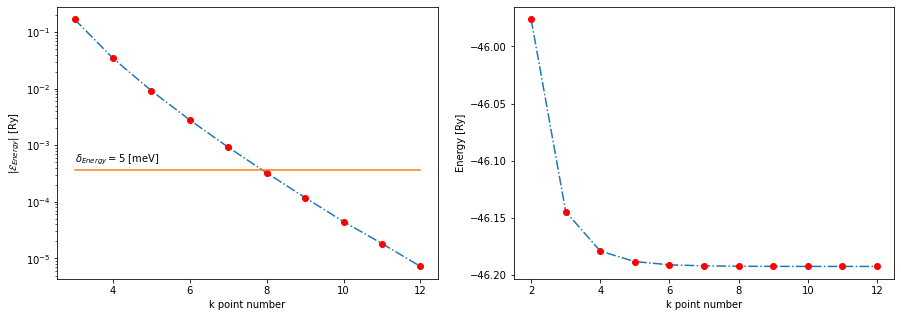

In [ ]:
fig_2, axs_2 = plt.subplots(1, 2, figsize = (15, 5))
axs_2[0].plot([3,4,5,6,7,8,9,10,11,12], ener_diff_k, '-.') 
axs_2[0].plot([3,4,5,6,7,8,9,10,11,12], ener_diff_k, 'ro') 
axs_2[0].plot([3, 12], [0.00036749405469679, 0.00036749405469679], '-')
axs_2[0].text(3, 0.0005, '$\delta_{Energy} = 5$ [meV]')
axs_2[0].set_xlabel('k point number')
axs_2[0].set_ylabel('|$\mathcal{E}_{Energy}$| [Ry]')
axs_2[0].set_yscale('log')
axs_2[1].plot(kpoint, energy_k, '-.') 
axs_2[1].plot(kpoint, energy_k, 'ro') 
axs_2[1].set_xlabel('k point number')
axs_2[1].set_ylabel('Energy [Ry]')

It can be deduced that the converged k point number is **8**.

###Exercise 1c

*Displace one of the atoms in your unit cell by +0.05 in the z direction (fractional coordinates). Keeping other parameters fixed, calculate the force on the displaced atom as a function of planewave cutoff. A good value would be converged to within 10 meV/Ångstrom (convert this value to Ryd/bohr). Tabulate and make a graph of your results. Use a $6\times 6\times 6$ k-point grid and energy cutoffs in the range 20 – 100 Ry. Repeat the calculations at a fixed planewave cutoff while varying the k-point grid.*

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/z-20.out https://hanfengzhai.net/data/MSE5720/z-30.out https://hanfengzhai.net/data/MSE5720/z-40.out https://hanfengzhai.net/data/MSE5720/z-50.out https://hanfengzhai.net/data/MSE5720/z-60.out https://hanfengzhai.net/data/MSE5720/z-70.out https://hanfengzhai.net/data/MSE5720/z-80.out https://hanfengzhai.net/data/MSE5720/z-90.out https://hanfengzhai.net/data/MSE5720/z-100.out

In [ ]:
!awk '/Total force =/' z-20.out z-30.out z-40.out z-50.out z-60.out z-70.out z-80.out z-90.out z-100.out

     Total force =     0.162858     Total SCF correction =     0.000035
     Total force =     0.161441     Total SCF correction =     0.000003
     Total force =     0.161350     Total SCF correction =     0.000012
     Total force =     0.161298     Total SCF correction =     0.000010
     Total force =     0.161201     Total SCF correction =     0.000015
     Total force =     0.161232     Total SCF correction =     0.000004
     Total force =     0.161209     Total SCF correction =     0.000004
     Total force =     0.161204     Total SCF correction =     0.000007
     Total force =     0.161203     Total SCF correction =     0.000005


In [ ]:
force_1c = np.array([0.162858, 0.161441, 0.161350, 0.161298, 0.161201, 0.161232, 0.161209, 0.161204, 0.161203])
cutoff_1c = [20, 30, 40, 50, 60, 70, 80, 90, 100]
force_1c_diff = np.abs([force_1c[1]-force_1c[0],force_1c[2]-force_1c[1],force_1c[3]-force_1c[2], force_1c[4]-force_1c[3], force_1c[5]-force_1c[4], force_1c[6]-force_1c[5], force_1c[7]-force_1c[6], force_1c[8]-force_1c[7]])
tab_1c = Table().with_columns(['Planewave cutoff [Ry]', cutoff_1c, 'Force [Ry]', force_1c])
tab_1c

Planewave cutoff [Ry],Force [Ry]
20,0.162858
30,0.161441
40,0.16135
50,0.161298
60,0.161201
70,0.161232
80,0.161209
90,0.161204
100,0.161203


Text(0, 0.5, 'Force [Ry/bohr]')

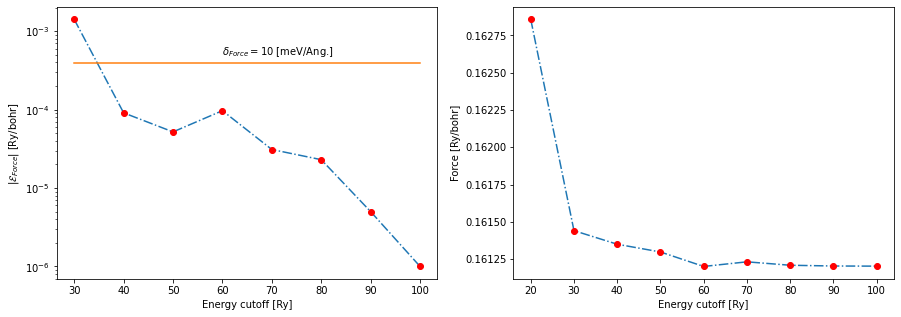

In [ ]:
fig_3, axs_3 = plt.subplots(1, 2, figsize = (15, 5))
axs_3[0].plot(cutoff_1c[1:9], force_1c_diff, '-.') 
axs_3[0].plot(cutoff_1c[1:9], force_1c_diff, 'ro') 
axs_3[0].plot([30, 100], [3.8894e-04, 3.8894e-04], '-')
axs_3[0].text(60, 0.0005, '$\delta_{Force} = 10$ [meV/Ang.]')
axs_3[0].set_xlabel('Energy cutoff [Ry]')
axs_3[0].set_ylabel('|$\mathcal{E}_{Force}$| [Ry/bohr]')
axs_3[0].set_yscale('log')
axs_3[1].plot(cutoff_1c, force_1c, '-.')
axs_3[1].plot(cutoff_1c, force_1c, 'ro')
axs_3[1].set_xlabel('Energy cutoff [Ry]')
axs_3[1].set_ylabel('Force [Ry/bohr]')

In [ ]:
# !wget https://hanfengzhai.github.io/data/MSE5720/c_k2.out https://hanfengzhai.github.io/data/MSE5720/c_k3.out https://hanfengzhai.github.io/data/MSE5720/c_k4.out https://hanfengzhai.github.io/data/MSE5720/c_k5.out https://hanfengzhai.github.io/data/MSE5720/c_k6.out https://hanfengzhai.github.io/data/MSE5720/c_k7.out https://hanfengzhai.github.io/data/MSE5720/c_k8.out https://hanfengzhai.github.io/data/MSE5720/c_k9.out

In [ ]:
!awk '/Total force =/' c_k2.out c_k3.out c_k4.out c_k5.out c_k6.out c_k7.out c_k8.out c_k9.out

     Total force =     0.224131     Total SCF correction =     0.000006
     Total force =     0.179518     Total SCF correction =     0.000003
     Total force =     0.167275     Total SCF correction =     0.000005
     Total force =     0.162975     Total SCF correction =     0.000013
     Total force =     0.161350     Total SCF correction =     0.000012
     Total force =     0.160728     Total SCF correction =     0.000012
     Total force =     0.160490     Total SCF correction =     0.000012
     Total force =     0.160402     Total SCF correction =     0.000012


In [ ]:
force_1c_k = np.array([0.224131,0.179518,0.167275,0.162975,0.161350,0.160728,0.160490,0.160402])
k_point_1c = [2,3,4,5,6,7,8,9]
kpoint_1c_diff = np.abs([force_1c_k[1]-force_1c_k[0],force_1c_k[2]-force_1c_k[1],force_1c_k[3]-force_1c_k[2], force_1c_k[4]-force_1c_k[3], force_1c_k[5]-force_1c_k[4], force_1c_k[6]-force_1c_k[5], force_1c_k[7]-force_1c_k[6]])
tab_1c = Table().with_columns(['K point number', k_point_1c, 'Force [Ry]', force_1c_k])
tab_1c

K point number,Force [Ry]
2,0.224131
3,0.179518
4,0.167275
5,0.162975
6,0.16135
7,0.160728
8,0.16049
9,0.160402


Text(0, 0.5, 'Force [Ry/bohr]')

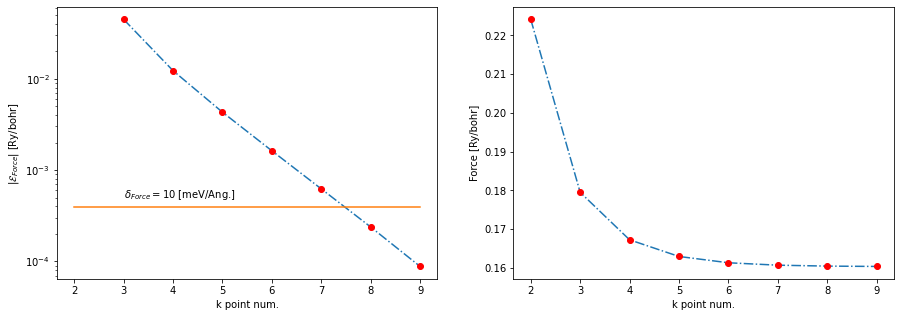

In [ ]:
fig_4, axs_4 = plt.subplots(1, 2, figsize = (15, 5))
axs_4[0].plot(k_point_1c[1:8], kpoint_1c_diff, '-.') 
axs_4[0].plot(k_point_1c[1:8], kpoint_1c_diff, 'ro') 
axs_4[0].plot([2,9], [3.8894e-04, 3.8894e-04], '-')
axs_4[0].text(3, 0.0005, '$\delta_{Force} = 10$ [meV/Ang.]')
axs_4[0].set_xlabel('k point num.')
axs_4[0].set_ylabel('|$\mathcal{E}_{Force}$| [Ry/bohr]')
axs_4[0].set_yscale('log')
axs_4[1].plot(k_point_1c, force_1c_k, '-.')
axs_4[1].plot(k_point_1c, force_1c_k, 'ro')
axs_4[1].set_xlabel('k point num.')
axs_4[1].set_ylabel('Force [Ry/bohr]')

It can be deduced that the planewave cutoff is **40 Ry** and the converged k point number is **8**.

##Exercise 2: Optimization of lattice constants

###Exercise 2a

*Keeping the calculation type as ```scf```, vary the lattice constant $±5\%$ from the initial value in the input file (you can decide on the increments but ideally you should have approximately 10-12 data points in total). Use the converged plane wave cutoff and k-point mesh from Exercise 1C.*

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/2a_1.out https://hanfengzhai.net/data/MSE5720/2a_2.out https://hanfengzhai.net/data/MSE5720/2a_3.out https://hanfengzhai.net/data/MSE5720/2a_4.out https://hanfengzhai.net/data/MSE5720/2a_5.out https://hanfengzhai.net/data/MSE5720/2a0.out https://hanfengzhai.net/data/MSE5720/2a1.out https://hanfengzhai.net/data/MSE5720/2a1.out https://hanfengzhai.net/data/MSE5720/2a2.out https://hanfengzhai.net/data/MSE5720/2a3.out https://hanfengzhai.net/data/MSE5720/2a4.out https://hanfengzhai.net/data/MSE5720/2a5.out

In [ ]:
!awk '/!    total energy              =/' 2a5.out 2a4.out 2a3.out 2a2.out 2a1.out 2a0.out 2a_1.out 2a_2.out 2a_3.out 2a_4.out 2a_5.out

!    total energy              =     -46.15638523 Ry
!    total energy              =     -46.16511922 Ry
!    total energy              =     -46.17154250 Ry
!    total energy              =     -46.17585219 Ry
!    total energy              =     -46.17821564 Ry
!    total energy              =     -46.17881159 Ry
!    total energy              =     -46.17779316 Ry
!    total energy              =     -46.17529948 Ry
!    total energy              =     -46.17147357 Ry
!    total energy              =     -46.16643653 Ry
!    total energy              =     -46.16029823 Ry


The data fitting function considering the equations in the homework template is written as:

$$E_{tot}(a) \approx E_0 + \frac{1}{2} \left[\frac{d^2 E_{tot}}{da^2}\right]_{a_0} (a - a_0)^2$$

In [ ]:
Ener_2a = np.array([-46.15638523,-46.16511922,-46.17154250,-46.17585219,-46.17821564,-46.17881159,-46.17779316,-46.17529948,-46.17147357,-46.16643653,-46.16029823])
Lattice_2a = np.array([8.55, 8.64, 8.73, 8.82, 8.91, 9, 9.09, 9.18, 9.27, 9.36, 9.45])
Lattice_2a_Angstrom = Lattice_2a * 0.529177

[-46.17885855   0.3609887    4.76870022]


Text(4.52, -46.16, '$E_{tot}\\;(a)=-46.17885855+0.3609887 (a-4.76870022)^2$')

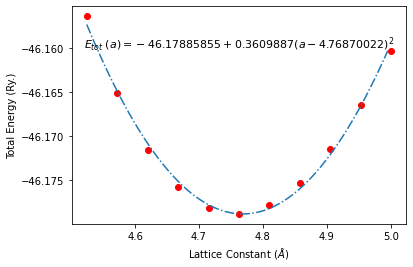

In [ ]:
# np.polyfit(Lattice_2a, Ener_2a, 2)
import scipy
def ener_fit(Lattice_2a_Angstrom, E0, betta, a0):
  return E0 + betta * (Lattice_2a_Angstrom - a0)**2
popt, _ = scipy.optimize.curve_fit(ener_fit, Lattice_2a_Angstrom, Ener_2a)
print(popt)
lattice_continu = np.arange(8.55, 9.45, 0.01) * 0.529177
Ener_fit_func = -46.17885855 + 0.3609887*(lattice_continu -  4.76870022)**2
plt.plot(Lattice_2a_Angstrom, Ener_2a, 'ro')
plt.plot(lattice_continu, Ener_fit_func, '-.')
plt.xlabel('Lattice Constant ($\AA$)')
plt.ylabel('Total Energy (Ry.)')
plt.text(4.52,-46.16,'$E_{tot}\;(a)=-46.17885855+0.3609887 (a-4.76870022)^2$', fontsize=11)

We therefore obtain the fitting parameters: $E_0 = -46.17885855\rm\ Ry$, $\beta = 0.3609887\ \frac{\rm Ry}{Å^2}$, $a_0 = 4.76870022Å$.

If taking the value from Wikipedia [4] as a benchmark value, the fitted lattice constant has a relative error of $0.17\%$. 

###Exercise 2b

*Change the calculation type to ```vc-relax``` and add the following lines to your input file. The ion dynamics and cell dynamics keywords select the optimization algorithm (in this case, Broyden-Fletcher-Goldfarb-Shanno), while press=0.d0 is the target pressure on the cell in KBar, i.e. the calculation will stop when the pressure on the unit cell is 0 KBar (actually, less than 0.5 KBar). Two other criteria must be satisfied.*

In [ ]:
prob1_c_new = 8.9724*0.529177
print(prob1_c_new)

4.747987714800001


The optimized lattice constant is $4.747987714800001 Å$. If taking the value from Wikipedia [4] as a benchmark value, the fitted lattice constant has a relative error of $0.61\%$. Also, comparing with the results from Lv et al. [1], the lattice constant of BAs equals $4.7830Å$, which means my calculated value has an relative error of $0.73 \%$.

###Exercise 2c

*What is the optimized value of the lattice constant for your material and how does it compare with the value you calculated using the fitting procedure above? How do your calculated values compare with a) experiment, and b) DFT calculations from the literature (you should make sure to compare with calculations performed with the same XC-functional you used) The material you are performing calculations on may exist in a number of different crystal structures. Make sure you are comparing your lattice constants to literature data on the same phase of the material.*


The optimized value from parabolic data fitting is 4.76870022Å, with an relative error of 0.17% compared with the benchmark value from Wikipedia [1]; the optimized lattice constant using Quantum ESPRESSO's inner optimiation algorithm is 4.747987714800001Å, has an relative error of 0.61% compared with the benchmark value from Wikipedia [4]. For DFT calculation using PBE pseudopotentials, the optimized lattice constant is 4.829Å [5], our curve fitting result has an relative error of 1.25%, and the Quantum ESPRESSO's ```bfgs``` optimized results have a relative error of 1.68%. For experimental values, referring to Mo et al. [5], the measured lattice constant is 4.764Å, the curve fitting result has a relative error of 0.0987%, and the ```bfgs``` optimized result has a relative error of 0.3361%.

##Exercise 3: Calculating the bulk modulus

###Exercise 3a

*Calculate the bulk modulus of your material (in GPa) at its equilibrium lattice parameter.*

In [ ]:
Volume_3a = Lattice_2a_Angstrom ** 3
def bulk_func(Volume_3a, a, b, c):
  return a * Volume_3a**2 + Volume_3a*b + c

popt, _ = scipy.optimize.curve_fit(bulk_func, Volume_3a, Ener_2a)
print(popt)
volum_continuum = np.arange(92.6192423,125.05420658, 0.01) 
Ener_fit_volume = 7.75451962e-05*volum_continuum**2 - 1.69079910e-02*volum_continuum - 4.52571956e+01

[ 7.75451962e-05 -1.69079910e-02 -4.52571956e+01]


The equation for computing the volume using the equation $V = ({\bf a}_1 \times {\bf a}_2) \cdot {\bf a}_3$

In [ ]:
a1_1 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[0]*0.529177; a2_1 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[0] * 0.529177;a3_1 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[0]*0.529177
a1_2 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[1]*0.529177; a2_2 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[1] * 0.529177; a3_2 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[1]*0.529177
a1_3 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[2]*0.529177; a2_3 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[2] * 0.529177; a3_3 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[2]*0.529177
a1_4 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[3]*0.529177; a2_4 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[3] * 0.529177; a3_4 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[3]*0.529177
a1_5 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[4]*0.529177; a2_5 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[4] * 0.529177; a3_5 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[4]*0.529177
a1_6 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[5]*0.529177; a2_6 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[5] * 0.529177; a3_6 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[5]*0.529177
a1_7 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[6]*0.529177; a2_7 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[6] * 0.529177; a3_7 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[6]*0.529177
a1_8 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[7]*0.529177; a2_8 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[7] * 0.529177; a3_8 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[7]*0.529177
a1_9 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[8]*0.529177; a2_9 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[8] * 0.529177; a3_9 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[8]*0.529177
a1_10 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[9]*0.529177; a2_10 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[9] * 0.529177; a3_10 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[9]*0.529177
a1_11 = np.array([-0.500000, 0.000000, 0.500000])*Lattice_2a[10]*0.529177; a2_11 = np.array([0.000000, 0.500000,0.500000])*Lattice_2a[10] * 0.529177; a3_11 = np.array([-0.500000, 0.500000, 0.000000])*Lattice_2a[10]*0.529177

Volume_3a_1 = np.dot(np.cross(a1_1,a2_1),a3_1);Volume_3a_2 = np.dot(np.cross(a1_2,a2_2),a3_2);Volume_3a_3 = np.dot(np.cross(a1_3,a2_3),a3_3)
Volume_3a_4 = np.dot(np.cross(a1_4,a2_4),a3_4);Volume_3a_5 = np.dot(np.cross(a1_5,a2_5),a3_5);Volume_3a_6 = np.dot(np.cross(a1_6,a2_6),a3_6)
Volume_3a_7 = np.dot(np.cross(a1_7,a2_7),a3_7);Volume_3a_8 = np.dot(np.cross(a1_8,a2_8),a3_8);Volume_3a_9 = np.dot(np.cross(a1_9,a2_9),a3_9)
Volume_3a_10 = np.dot(np.cross(a1_10,a2_10),a3_10);Volume_3a_11 = np.dot(np.cross(a1_11,a2_11),a3_11);
Volume_3a_unit = [Volume_3a_1,Volume_3a_2,Volume_3a_3,Volume_3a_4,Volume_3a_5,Volume_3a_6,Volume_3a_7,Volume_3a_8,Volume_3a_9,Volume_3a_10,Volume_3a_11]
type(Volume_3a_unit)
Volume_3a_unit = np.array(Volume_3a_unit)
Volume_3a_unit = Volume_3a_unit*.5
Volume_3a_unit# in the unit of Angstrom^3

array([11.57740529, 11.94686951, 12.32411164, 12.7092127 , 13.10225371,
       13.50331569, 13.91247966, 14.32982663, 14.75543764, 15.1893937 ,
       15.63177582])

In [ ]:
def bulk_func(x, a, b, c):
  return a * x**2 + b * x + c
popt, _ = scipy.optimize.curve_fit(bulk_func, Volume_3a_unit, Ener_2a*13.6056980659)
print(popt)
volum_continuum = np.arange(np.min(Volume_3a_unit), np.max(Volume_3a_unit))
Ener_fit_volume = (6.75234395e-02 * (volum_continuum)**2 -1.84035532e+00 * (volum_continuum) -6.15755772e+02)

[ 6.75234395e-02 -1.84035532e+00 -6.15755772e+02]


In [ ]:
import scipy
def bulk_func(x, a, b, c):
  return a * x**2 + b * x + c
popt, _ = scipy.optimize.curve_fit(bulk_func, Volume_3a_unit, Ener_2a)
print(popt)
volum_continuum = np.arange(np.min(Volume_3a_unit), np.max(Volume_3a_unit), 0.01)
Ener_fit_volume_new = (4.96288760e-03* (volum_continuum)**2 -1.35263793e-01 * (volum_continuum) -4.52571965e+01)

[ 4.96288760e-03 -1.35263793e-01 -4.52571965e+01]


Text(0, 0.5, 'Total Energy [eV]')

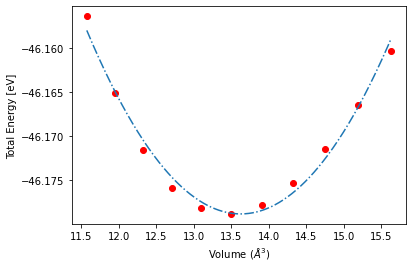

In [ ]:
plt.plot(Volume_3a_unit, Ener_2a, 'ro')
plt.plot(volum_continuum, Ener_fit_volume_new, '-.')
plt.xlabel('Volume ($\AA^3$)')
plt.ylabel('Total Energy [eV]')
# plt.text(2,-46.16,'$E_{tot}\;(a)=7.75\\times 10^{-5}V^2-1.69\\times10^{-2} V -45.26 $', fontsize=11)

According to the equation $B_0 = V\frac{d^2 E_{tot}}{dV^2}$, we can therefore compute the bulk modulus: 

$$B_0 =  \frac{1.84035532}{2\times 6.75234395\times 10^{-2}} \times 6.75234395\times 10^{-2} \times 160.21766208 \rm GPa = 147.4323 GPa$$.

According to Tian *et al*, [[1](https://aip.scitation.org/doi/10.1063/1.5093289)], the bulk modulus of BAs is 142 GPa, indicating the DFT computed bulk modulus has the relative error of $3.83\%$.

##Exercise 4: Effect of different XC-functionals on lattice parameter

*In the input file, modify the pseudopotential information to use PBE pseudopotentials (Espresso determines which XC-functional to use from the pseudopotential files. Calculate the equilibrium lattice parameter using Espresso’s optimization algorithm.*


The computed lattice constant is $9.1069$ bohr ($4.8192 Å$), having a relative error of $0.88\%$, if taking the value from Wikipedia [4] as a benchmark. Compared with our optimized values using curve fitting and Quantum ESPRESSO ```bfgs``` optimization algorithms, the ```LDA``` pseudopotentials has a relative higher value with a little higher relative errors. Also, considering DFT calculations using the LDA pseudopotantials, the literature [5] has a value of 4.750Å, the computed results have a relative error of 1.45%. Compared with the results from experiment [5], the DFT calculation has a relative error of 1.15%.

##Exercise 5: Linux and the supercomputing environment

*Draw a block diagram that visually represents the relationships between the following components of the Linux OS and the Stampede supercomputing environment: kernel, shell, login node, compute notes, batch queue, your laptop.*

![A schematic view for stampede environment](https://hanfengzhai.github.io/data/MSE5720/stampede_schematic.png)







##Summary

In this homework, the different physical properties of BAs were tested and computed using the DFT method. The energy convergence was tested by probing the k point and energy cutoff using the ```scf``` method. The data were extracted using ```awk``` and ```wget``` from the out files. For exercise 1, based on the energy differences convergence, it is found that for BAs, the plane wave cutoff is $50 \rm \ bohr$ and k point was $4$. For displaced BAs, it is found that the convergent k point is $8$ and the energy cutoff is $40 \rm \ bohr$. For exercise 2, the computed lattice constant is approximately $4.74 Å$, which aligns with the experimental value well, with a relative error of $0.73\%$ [1]. For exercise 3, the bulk modulus was computed by fitting the data between volume and energy in the second order. The computed bulk modulus is $147.4323\rm GPa$, which has a relative error of $3.83\%$ compared with the experimental value by Tian et al. [2]. For exercise 4, the computed lattice constant is $4.8192 Å$, which is larger compared with the computed value in exercise 2. If using the value from Wikipedia [4] as a benchmark, the relative errors of the computed lattice constants for curve fitting, Quantum ESPRESSO optimization algorithm, and PBE pseudopotentials are 0.17%, 0.61%, and 0.88%, respectively. A schematic of the XSEDE computing environment is provided for exercise 5. From the exercises, I am able to execute basic DFT computation techniques on materials convergence from different properties. I also grow a more advanced understanding of the definition of different properties, i.e., plane-wave cutoff, k point, and their effect on the convergence of energy differences.

##References

[1] Lv *et al.*, *Appl. Phys. Lett.*, 2019, [10.1063/1.4913441](https://aip.scitation.org/doi/abs/10.1063/1.4913441)

[2] Tian *et al.*, *Appl. Phys. Lett.*, 2019, [10.1063/1.5093289](https://doi.org/10.1063/1.5093289)

[3] Rössler. New Data and Updates for IV-IV, III-V, II-VI and I-VII Compounds, their Mixed Crystals and Diluted Magnetic Semiconductors, 2022, [10.1007/978-3-642-14148-5](https://materials.springer.com/bp/docs/978-3-642-14148-5)

[4] Wikipedia: https://en.wikipedia.org/wiki/Boron_arsenide

[5] Mo *et al.*, *AIP Advances*., 2018, [10.1063/1.5050241](https://doi.org/10.1063/1.5050241) 
